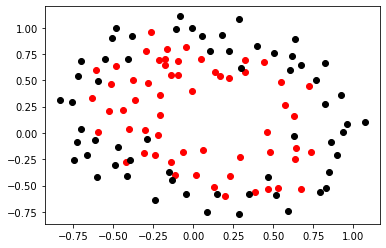

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("ex5data.txt",header = None, sep=",")
x = df.values[:,:-1]
y = df.values[:,-1]
m = len(y)
x_pos = x[y==1,:]
x_neg = x[y==0,:]
plt.scatter(x_pos[:,0],x_pos[:,1],c='r')
plt.scatter(x_neg[:,0],x_neg[:,1],c='k')

In [10]:
def mapfeature(x1,x2,m,degree):
    X = np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            X = np.concatenate((X,np.reshape((x1**(i-j))*x2**j,(m,1))),1)
    return X
degree = 6
X = mapfeature(x[:,0],x[:,1],m,degree)
print(X.shape)

(118, 28)


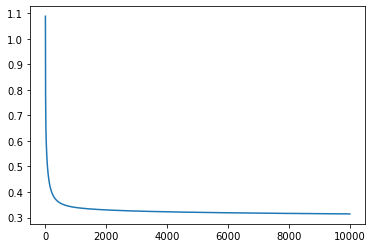

In [11]:
ite = 10000
lr = 1
J=np.zeros(ite)
y = np.reshape(y,(len(y),1))
np.random.seed(2)
theta = np.random.rand(X.shape[1],1)
z = np.dot(X,theta)
h = 1.0/(1.0+np.exp(-z))
for i in range(ite):
    theta = theta - (lr/m)*(np.dot((X.T),(h-y)))
    z = np.dot(X,theta)
    h = 1.0/(1.0+np.exp(-z))
    J[i]=np.mean(-y*np.log(h)-(1-y)*np.log(1-h))
plt.plot(J)

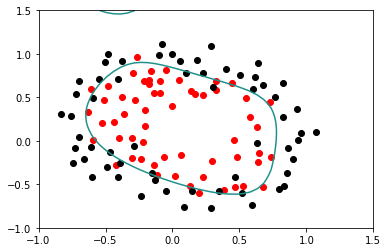

In [12]:
y = df.values[:,-1]
x_pos = x[y==1,:]
x_neg = x[y==0,:]
plt.scatter(x_pos[:,0],x_pos[:,1],c='r')
plt.scatter(x_neg[:,0],x_neg[:,1],c='k')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapfeature(u[i], v[j],1,degree),theta)
z = z.T
plt.contour(u, v, z,0)


In [16]:
v.shape

(50,)